# Yoga Pose Detection YOLOv8 

https://docs.ultralytics.com/tasks/pose/

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 11.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 20.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


In [2]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6013.7/8062.4 GB disk)


In [5]:
path0 = '/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000143.jpg'

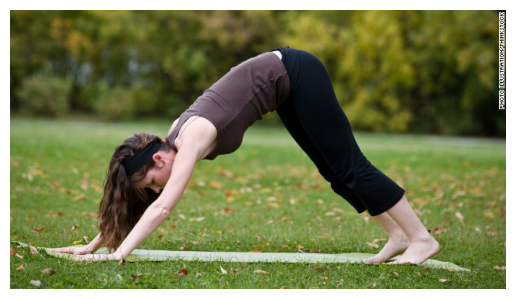

In [6]:
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [7]:
!rm -rf runs

In [8]:
# CLI type
!yolo pose predict model=yolov8n-pose.pt source={path0}  # predict with official model

100%|██████████████████████████████████████| 6.51M/6.51M [00:00<00:00, 76.1MB/s]
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients

image 1/1 /kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000143.jpg: 384x640 1 person, 22.5ms
Speed: 4.4ms preprocess, 22.5ms inference, 56.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/pose/predict


In [9]:
!ls runs/pose/

predict


In [11]:
path2='runs/pose/predict/00000143.jpg'

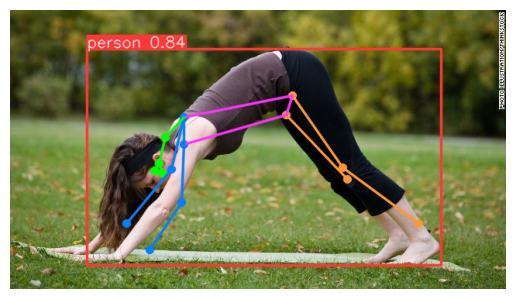

In [12]:
img=plt.imread(path2)
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model
# Predict with the model
results = model(path0)  


image 1/1 /kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000143.jpg: 384x640 1 person, 23.2ms
Speed: 2.3ms preprocess, 23.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference and postprocess speeds in milliseconds per image.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

In [14]:
BOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    arri=pd.DataFrame(results[i].boxes.data).astype(float)
    arri['i']=i
    BOX=pd.concat([BOX,arri],axis=0)
BOX.columns=['x','y','x2','y2','confidence','class','i']
display(BOX)

,x,y,x2,y2,confidence,class,i
0,99.0,50.0,556.0,329.0,0.836951,0.0,0.0
